In [54]:
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

In [44]:
glass_identification = fetch_ucirepo(id=42)
X = glass_identification.data.features
y = glass_identification.data.targets

feature_names = X.columns.tolist()

In [46]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### 2. Масштабирование признаков
Мастшабирование будет производиться с помощью MinMaxScaler для того, чтобы привести все значения к диапазону [0; 1]

In [48]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), columns=feature_names)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


### 3. Разделение данных на обучающую и тестовую выборку

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.2
)

### 4. Выбор и обучение классификаторов
Были выбраны следующие модели: KNN, RandomForestClassifier, GradientBoostingClassifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [78]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn_classifier = knn_classifier.predict(X_test)

In [80]:
random_forest_classifier = RandomForestClassifier(n_estimators=500)
random_forest_classifier.fit(X_train, y_train)
y_pred_random_forest_classifier = random_forest_classifier.predict(X_test)

In [82]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=5)
gradient_boosting_classifier.fit(X_train, y_train)
y_pred_gradient_boosting_classifier = gradient_boosting_classifier.predict(X_test)

### 5. Сравнение производительности моделей
Для сравнения производительности моделей будут использованы: точность, матрица ошибок

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [88]:
knn_classifier_accuracy = accuracy_score(y_test, y_pred_knn_classifier)
random_forest_classifier_accuracy = accuracy_score(y_test, y_pred_random_forest_classifier)
gradient_boosting_classifier_accuracy = accuracy_score(y_test, y_pred_gradient_boosting_classifier)

print(f'Точность KNN: {knn_classifier_accuracy:.3f}')
print(f'Точность RandomForestClassifier: {random_forest_classifier_accuracy:.3f}')
print(f'Точность GradientBoostingClassifier: {gradient_boosting_classifier_accuracy:.3f}')

Точность KNN: 0.651
Точность RandomForestClassifier: 0.860
Точность GradientBoostingClassifier: 0.860


In [116]:
classes = np.unique(y)

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn_classifier, labels=classes)
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_random_forest_classifier, labels=classes)
confusion_matrix_gbc = confusion_matrix(y_test, y_pred_gradient_boosting_classifier, labels=classes)

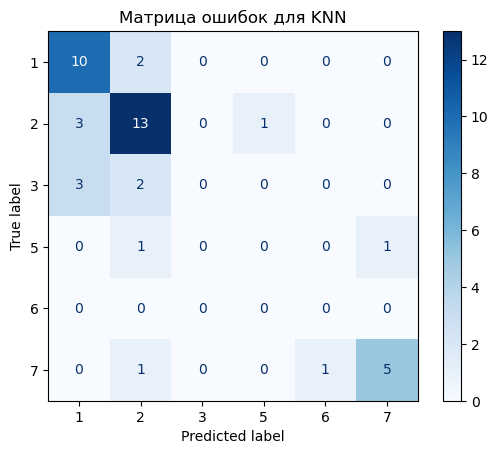

In [112]:
confusion_matrix_knn_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_knn,
    display_labels=classes
)

confusion_matrix_knn_display.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок для KNN')
plt.show()

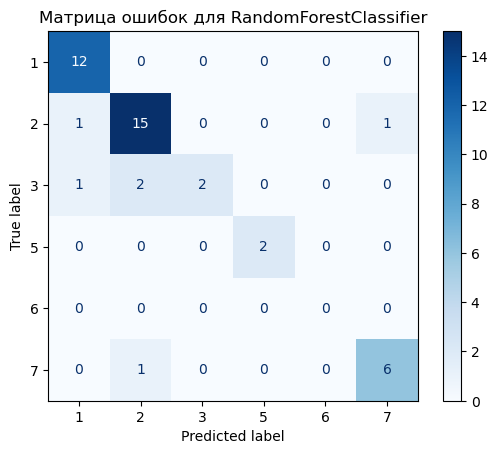

In [114]:
confusion_matrix_rfc_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_rfc,
    display_labels=classes
)

confusion_matrix_rfc_display.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок для RandomForestClassifier')
plt.show()

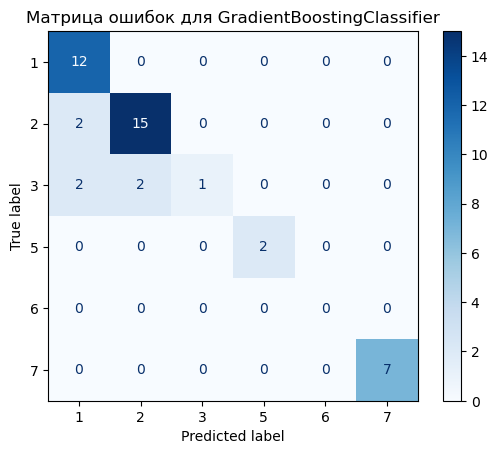

In [118]:
confusion_matrix_gbc_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_gbc,
    display_labels=classes
)

confusion_matrix_gbc_display.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок для GradientBoostingClassifier')
plt.show()

### 6. Подбор гиперпараметров
Для подбора гиперпараметров будет использован GridSearchCV

In [122]:
from sklearn.model_selection import GridSearchCV

In [184]:
knn_param_grid = {
    'n_neighbors': [i for i in range(3, 11)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

knn_grid_search.fit(X_train, y_train)
print(f'Лучшие параметры для KNN: {knn_grid_search.best_params_}')
print(f'Лучшая точность для KNN: {knn_grid_search.best_score_:.3f}')

Лучшие параметры для KNN: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Лучшая точность для KNN: 0.713


In [181]:
rfc_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}

rfc_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rfc_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rfc_grid_search.fit(X_train, y_train)
print(f'Лучшие параметры для RandomForestClassifier: {rfc_grid_search.best_params_}')
print(f'Лучшая точность для RandomForestClassifier: {rfc_grid_search.best_score_:.3f}')

Лучшие параметры для RandomForestClassifier: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200}
Лучшая точность для RandomForestClassifier: 0.807


In [149]:
bgc_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

bgc_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=bgc_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

bgc_grid_search.fit(X_train, y_train)
print(f'Лучшие параметры для GradientBoostingClassifier: {bgc_grid_search.best_params_}')
print(f'Лучшая точность для GradientBoostingClassifier: {bgc_grid_search.best_score_:.3f}')

Лучшие параметры для GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Лучшая точность для GradientBoostingClassifier: 0.754


### 7. Визуализация результатов
Для визуализации результатов будут использоваться важность признаков и корреляционная матрица

In [161]:
import seaborn as sns
from sklearn.inspection import permutation_importance

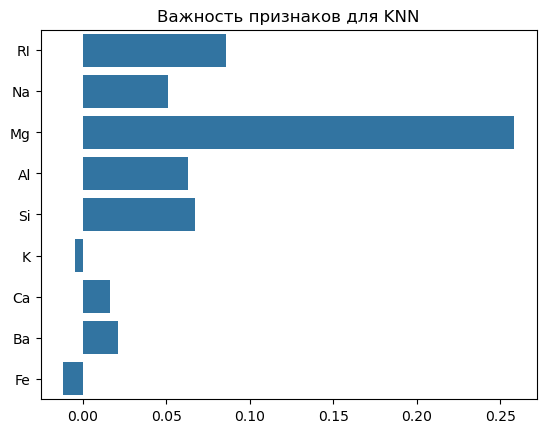

In [165]:
knn_permutation_importance_result = permutation_importance(
    knn_classifier, X_test, y_test, n_repeats=10
)
knn_classifier_importances = knn_permutation_importance_result.importances_mean

sns.barplot(x=knn_classifier_importances, y=feature_names)
plt.title('Важность признаков для KNN')
plt.show()

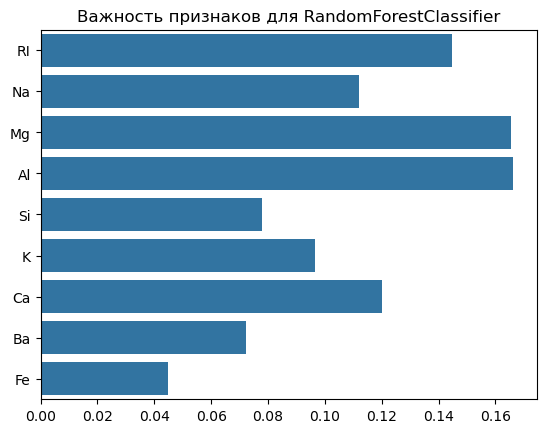

In [159]:
random_forest_classifier_importances = random_forest_classifier.feature_importances_

sns.barplot(x=random_forest_classifier_importances, y=feature_names)
plt.title('Важность признаков для RandomForestClassifier')
plt.show()

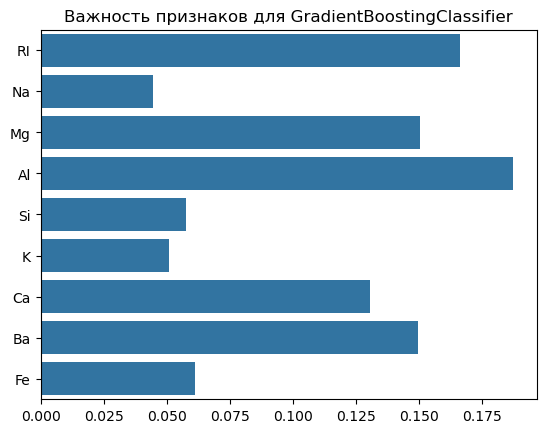

In [167]:
gradient_boosting_classifier_importances = gradient_boosting_classifier.feature_importances_

sns.barplot(x=gradient_boosting_classifier_importances, y=feature_names)
plt.title('Важность признаков для GradientBoostingClassifier')
plt.show()

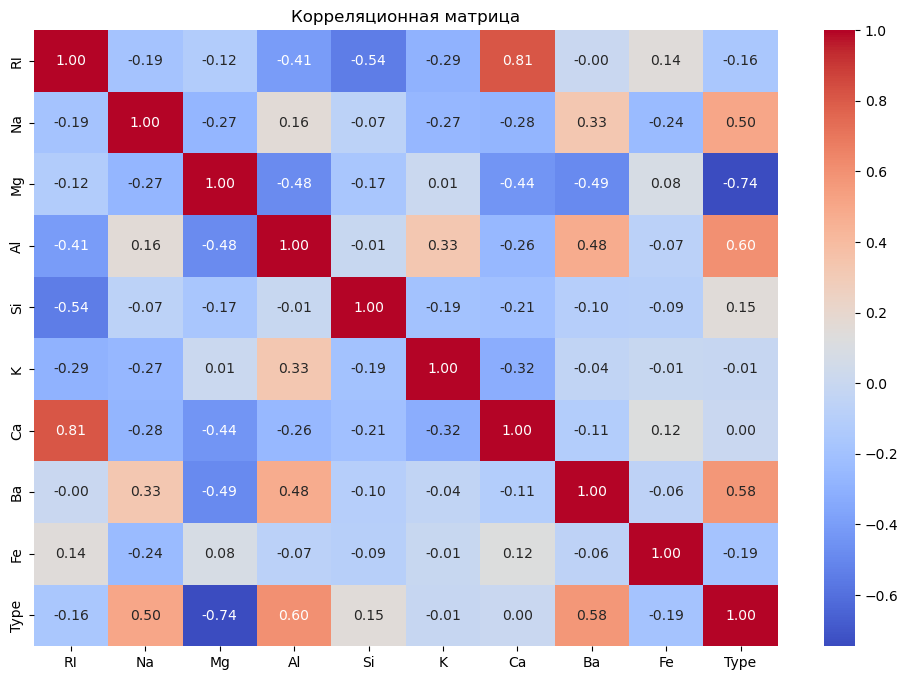

In [171]:
complete_dataset = X.copy()
complete_dataset['Type'] = y

correlation_matrix = complete_dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

### 9. Оптимизация модели

In [199]:
optimized_knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='manhattan')
optimized_knn.fit(X_train, y_train)
y_pred_optimized_knn = optimized_knn.predict(X_test)

optimized_knn_accuracy = accuracy_score(y_test, y_pred_optimized_knn)
print(f'Точность оптимизированной модели KNN: {optimized_knn_accuracy}')

Точность оптимизированной модели KNN: 0.7441860465116279


In [255]:
optimized_rfc = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, max_features='sqrt', max_depth=20)
optimized_rfc.fit(X_train, y_train)
y_pred_optimized_rfc = optimized_rfc.predict(X_test)

optimized_rfc_accuracy = accuracy_score(y_test, y_pred_optimized_rfc)
print(f'Точность оптимизированной модели RandomForestClassifier: {optimized_rfc_accuracy}')

Точность оптимизированной модели RandomForestClassifier: 0.8837209302325582


In [257]:
# {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
optimized_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8)
optimized_gbc.fit(X_train, y_train)
y_pred_optimized_gbc = optimized_gbc.predict(X_test)

optimized_gbc_accuracy = accuracy_score(y_test, y_pred_optimized_gbc)
print(f'Точность оптимизированной модели GradientBoostingClassifier: {optimized_gbc_accuracy}')

Точность оптимизированной модели GradientBoostingClassifier: 0.8837209302325582
